23:31:47 - cmdstanpy - INFO - Chain [1] start processing
23:31:47 - cmdstanpy - INFO - Chain [1] done processing
23:31:48 - cmdstanpy - INFO - Chain [1] start processing
23:31:48 - cmdstanpy - INFO - Chain [1] done processing
23:31:48 - cmdstanpy - INFO - Chain [1] start processing
23:31:48 - cmdstanpy - INFO - Chain [1] done processing
23:31:48 - cmdstanpy - INFO - Chain [1] start processing
23:31:48 - cmdstanpy - INFO - Chain [1] done processing
23:31:48 - cmdstanpy - INFO - Chain [1] start processing
23:31:49 - cmdstanpy - INFO - Chain [1] done processing
23:31:49 - cmdstanpy - INFO - Chain [1] start processing
23:31:49 - cmdstanpy - INFO - Chain [1] done processing
23:31:49 - cmdstanpy - INFO - Chain [1] start processing
23:31:49 - cmdstanpy - INFO - Chain [1] done processing
23:31:49 - cmdstanpy - INFO - Chain [1] start processing
23:31:49 - cmdstanpy - INFO - Chain [1] done processing
23:31:49 - cmdstanpy - INFO - Chain [1] start processing
23:31:49 - cmdstanpy - INFO - Chain [1]

The time used for the for-loop forecast is  7.0533599853515625
            ds             states        yhat  yhat_upper  yhat_lower
0   2019-01-07     Andhra Pradesh  170.747117  190.365211  149.454543
1   2019-01-08     Andhra Pradesh  172.501600  193.496075  152.103789
2   2019-01-09     Andhra Pradesh  172.462959  191.907722  152.000199
3   2019-01-10     Andhra Pradesh  171.373714  192.027657  151.112161
4   2019-01-11     Andhra Pradesh  171.470135  191.543835  151.837719
5   2019-01-12     Andhra Pradesh  169.263718  187.846984  150.257229
6   2019-01-13     Andhra Pradesh  172.647914  193.100360  152.729242
7   2019-01-14     Andhra Pradesh  170.978072  191.180718  152.653997
8   2019-01-15     Andhra Pradesh  172.732556  193.061284  153.259625
9   2019-01-16     Andhra Pradesh  172.693914  193.070739  152.023564
10  2019-01-17     Andhra Pradesh  171.604669  190.272758  150.139420
11  2019-01-18     Andhra Pradesh  171.701090  191.518005  151.378450
12  2019-01-19     Andhra P

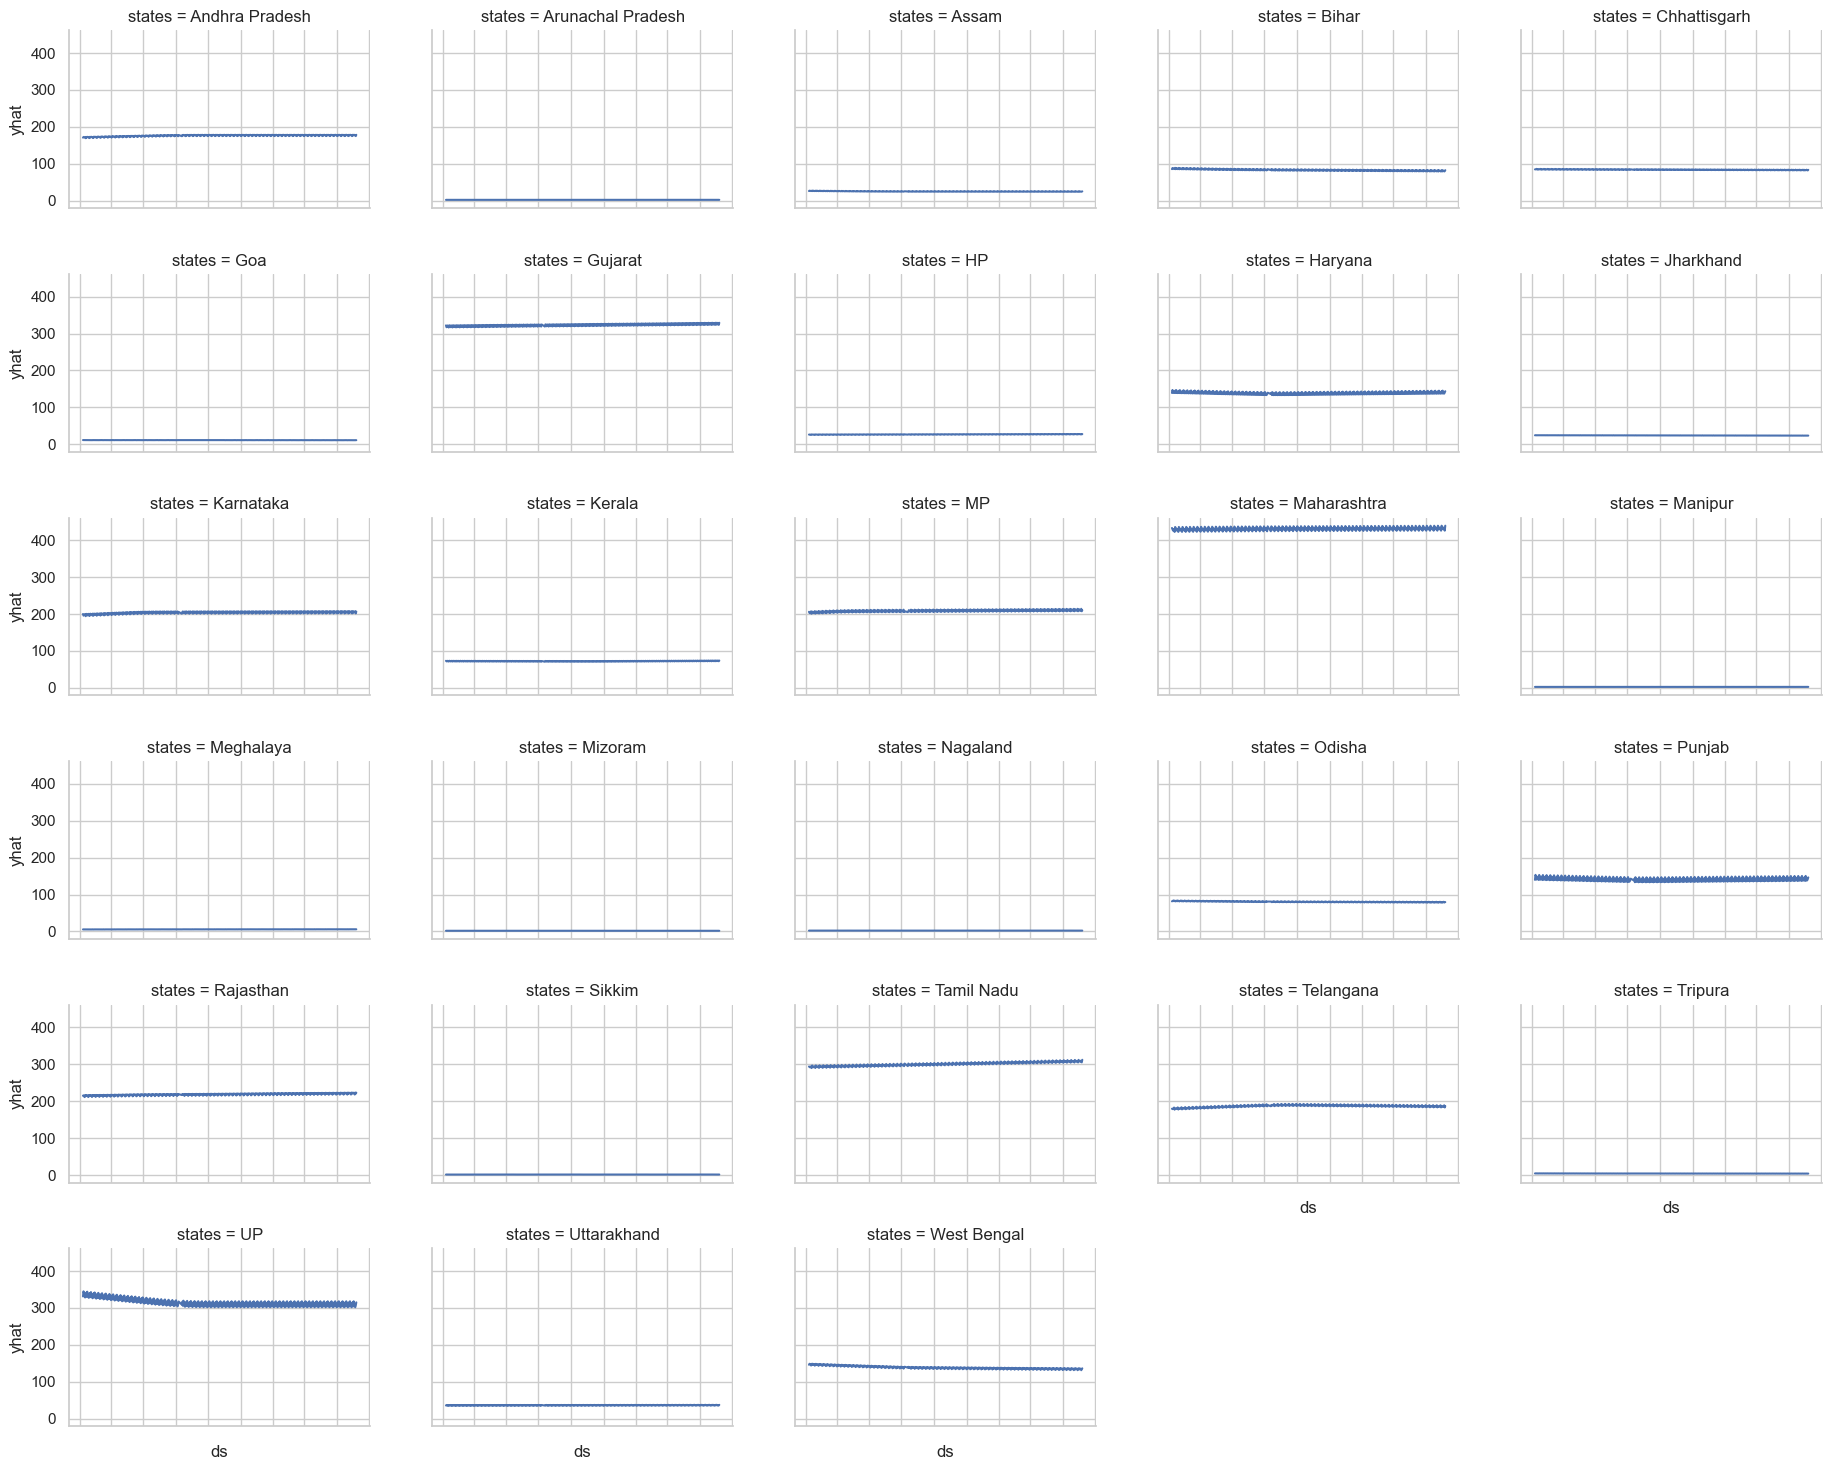

In [66]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

# Load data
data = pd.read_csv('dataset.csv')

# Select the columns that you want to use for forecasting
selected_columns = ['Date', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',    'Goa', 'Gujarat', 'Haryana', 'HP', 'Jharkhand', 'Karnataka',    'Kerala', 'MP', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',    'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',    'Telangana', 'Tripura', 'UP', 'Uttarakhand', 'West Bengal']
data = data[selected_columns]
state_list = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',    'Goa', 'Gujarat', 'Haryana', 'HP', 'Jharkhand', 'Karnataka',    'Kerala', 'MP', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',    'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',    'Telangana', 'Tripura', 'UP', 'Uttarakhand', 'West Bengal']
# Convert date column to datetime type
data['ds'] = pd.to_datetime(data['Date'])

# Rename columns to 'ds' and 'y' as expected by Prophet
data = data.rename(columns={'energy_usage': 'y'})

df = pd.melt(data, id_vars='Date', value_vars=state_list[0:])
#df = pd.melt(data, id_vars='Date', value_vars=['Date', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',    'Goa', 'Gujarat', 'Haryana', 'HP', 'Jharkhand', 'Karnataka',    'Kerala', 'MP', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',    'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',    'Telangana', 'Tripura', 'UP', 'Uttarakhand', 'West Bengal'])
df.columns = ['ds', 'states', 'y']
df.head()



# Group the data by state
groups_by_state = df.groupby('states')

# Check the groups in the dataframe
groups_by_state.groups.keys()

def train_and_forecast(group):
  # Initiate the model
  m = Prophet()
  
  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods=15)
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['states'] = group['states'].iloc[0]
  
  # Return the forecasted results
  return forecast[['ds', 'states', 'yhat', 'yhat_upper', 'yhat_lower']]

# Start time
start_time = time()
count = 0
# Create an empty dataframe
forecast_df = pd.DataFrame()

# Loop through each state
for state, group in groups_by_state:
  group = groups_by_state.get_group(state)  
  # Make forecast
  forecast = train_and_forecast(group)
  # Add the forecast results to the dataframe
  forecast_df = pd.concat((forecast_df, forecast))
  forecast_df.head()

    
print('The time used for the for-loop forecast is ', time()-start_time)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(forecast_df)


# Plot the forecasts for each state
sns.set_style('whitegrid')
g = sns.FacetGrid(forecast_df, col='states', col_wrap=5, height=2.5, aspect=1.5)
g.map(plt.plot, 'ds', 'yhat')
g.set_xticklabels(rotation=45)
plt.show()



ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

NameError: name 'state_names' is not defined